## <font color = "#CC3D3D">Case #1: Differentiation of image</font>

<hr>

### Step #1: What is edge?
<hr>

- 에지(edge)
    - 영상에서 픽셀의 밝기 값이 급격하게 변하는 부분.
    - 일반적으로 배경과 객체, 또는 객체와 객체의 경계를 뜻한다.

<br>

<img src="images/markdown/edge_graph.png" width="500">

<hr>

### Step #2: How to edge detection
<hr>

- 기본적인 에지 검출 방법
    - 영상을 (x, y) 두 개의 변수를 가진 함수로 간주했을 때, 이 함수를 1차 미분하여<br>
도함수의 함수값이 크게 나타나는 부분을 검출한다.

<br>

<img src="images/markdown/finding_edge_process.png" width="600">
<hr>

- 1차 미분의 근사화(approximation)
    - 아래 3가지 방법 중 3번째인 `중앙 차분(Centered difference)`이 계산이 가장 정확하다고 알려져 있다.

$$\cdot\text{전진 차분(Forward difference):}\quad
\frac{\partial I}{\partial x}\cong\frac{I(x+h)-I(x)}{h}$$

$$\cdot\text{후진 차분(Backward difference):}\quad
\frac{\partial I}{\partial x}\cong\frac{I(x)-I(x-h)}{h}$$

$${\color{Red}\surd}\cdot\text{중앙 차분(Centered difference):}\quad
\frac{\partial I}{\partial x}\cong\frac{I(x+h)-I(x-h)}{2h}$$
<hr>

- 다양한 미분 마스크

<br>

<img src="images/markdown/derivative_mask.png" width="500">

<hr>

### Step #3: about funtion
<hr>

> `소벨 필터를 이용한 미분 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}Sobel}(src, ddepth, dx, dy, dst, ksize, scale, delta, borderType)\rightarrow dst}$$
- src: source. 
- ddepth: data type depth. 출력 영상 데이터 타입. -1이면 입력 영상과 같은 데이터 타입을 사용한다.
- dx: x 방향 미분 차수.
- dy: y 방향 미분 차수.
- dst: destination. 출력 영상 행렬
- ksize: kernel size. 커널 크기. `기본값은 3`
- scale: 연산 결과에 추가적으로 곱할 값. `기본값은 1`
- delta: 연산 결과에 추가적으로 더할 값. `기본값은 0`
- borderType: 가장자리 픽셀 확장 방식. `기본값은 cv2.BORDER_DEFAULT`
- 참고사항:
    - 미분 차수를 설정할 때 일반적으로 대부분 방향에 따라서 dx=1, dy=0, ksize=3<br>
또는 dx=0, dy=1, ksize=3 으로 지정한다.
<hr>

> `샤르 필터를 이용한 미분 함수
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}Sobel}(src, ddepth, dx, dy, dst, scale, delta, borderType)\rightarrow dst}$$
- src: source. 
- ddepth: data type depth. 출력 영상 데이터 타입. -1이면 입력 영상과 같은 데이터 타입을 사용한다.
- dx: x 방향 미분 차수.
- dy: y 방향 미분 차수.
- dst: destination. 출력 영상 행렬
- scale: 연산 결과에 추가적으로 곱할 값. `기본값은 1`
- delta: 연산 결과에 추가적으로 더할 값. `기본값은 0`
- borderType: 가장자리 픽셀 확장 방식. `기본값은 cv2.BORDER_DEFAULT`

In [ ]:
import cv2
help(cv2.Sobel)

In [ ]:
import cv2
help(cv2.Scharr)

<hr>

### Step #4: implementation example
<hr>

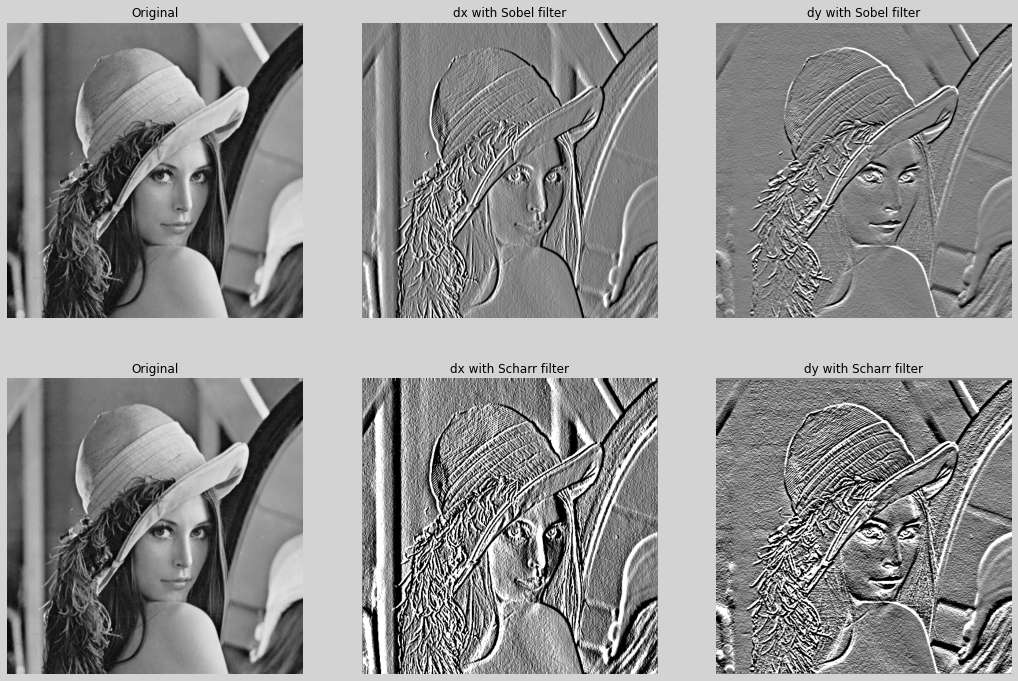

-1

In [136]:
# Derivative of image example using sobel filter - 소벨 필터를 이용한 영상의 미분 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

# 3x3 소벨 미분 마스크를 직접 구현해서 적용
# kernel = np.array([
#     [-1, 0, 1],
#     [-2, 0, 2],
#     [-1, 0, 1]], dtype=np.float32)
# dx = cv2.filter2D(source, -1, kernel, delta=128)

# x, y 방향으로 각각 1차 미분
dx_sobel = cv2.Sobel(source, -1, 1, 0, delta=128)
dy_sobel = cv2.Sobel(source, -1, 0, 1, delta=128)
dx_scharr = cv2.Scharr(source, -1, 1, 0, delta=128)
dy_scharr = cv2.Scharr(source, -1, 0, 1, delta=128)

# pyplot으로 출력
plt.figure(figsize=(18, 12), facecolor="lightgray")

plt.subplot(231, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(232, title="dx with Sobel filter").axis("off")
plt.imshow(dx_sobel, "gray")

plt.subplot(233, title="dy with Sobel filter").axis("off")
plt.imshow(dy_sobel, "gray")

plt.subplot(234, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(235, title="dx with Scharr filter").axis("off")
plt.imshow(dx_scharr, "gray")

plt.subplot(236, title="dy with Scharr filter").axis("off")
plt.imshow(dy_scharr, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("dx with Sobel filter", dx_sobel)
cv2.imshow("dy with Sobel filter", dy_sobel)
cv2.imshow("dx with Scharr filter", dx_scharr)
cv2.imshow("dy with Scharr filter", dy_scharr)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #2: Gradient and edge detection - 기울기와 경계 검출</font>

<hr>

### Step #1: What is gradient?
<hr>

- 영상의 기울기(Gradient)
    - 함수 f(x, y)를 x축과 y축으로 각각 편미분(Partial derivative)하여 벡터 형태로 표현한 것이다.

$$\cdot\text{그래디언트:}\quad\nabla f=\begin{bmatrix}f_x\\f_y\end{bmatrix}=\overrightarrow{f_x}+\overrightarrow{f_y}$$

$$\cdot\text{그래디언트 크기:}\quad|\nabla f|=\sqrt{f_x^2+f_y^2}$$

$$\cdot\text{그래디언트 방향:}\quad\theta=\tan^{-1}\left(\frac{f_y}{f_x}\right)$$

<hr>

### Step #2: What is magnitude and direction
<hr>

- 실제 영상에서 구한 그래디언트 크기와 방향
    - 그래디언트 크기: 픽셀 값의 차이 정도, 변화량
    - 그래디언트 방향: 픽셀 값이 가장 급격하게 `증가하는` 방향
    - 참고사항:
        - 빨강색 화살표 길이: 그래디언트 크기
        - 빨강색 화살표 방향: 그래디언트 방향
        - 노란색 화살표: 에지 방향

<br>

<img src="images/markdown/gradient_of_image.png" width="500">

<hr>

### Step #3: about funtion
<hr>

> `2D 벡터의 크기 계산 함수
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}magnitude}(x, y, magnitude)\rightarrow magnitude}$$
- x: 2D 벡터의 x 좌표 행렬.
- y: 2D 벡터의 y 좌표 행렬.
- magnitude: 2D 벡터의 크기 행렬.
- 참고사항:
    - x, y로 전달하는 행렬의 데이터 유형은 일반적으로 float 타입으로 한다.
    - magnitude 행렬은 x 행렬과 같은 자료형, 같은 크기를 가진다.
<hr>

> `2D 벡터의 방향 계산 함수
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}phase}(x, y, angle, angleInDegrees)\rightarrow angle}$$
- x: 2D 벡터의 x 좌표 행렬.
- y: 2D 벡터의 y 좌표 행렬.
- angle: 2D 벡터의 크기 행렬.
    - i.e., 만약 x성분, y성분 벡터의 크기가 0이면 angle은 0으로 설정된다.
- angleInDegrees: True 이면 각도 단위, False 이면 래디언 단위로 계산 된다.
- 참고사항:
    - x, y로 전달하는 행렬의 데이터 유형은 일반적으로 float 타입으로 한다.
    - angle 행렬은 x 행렬과 같은 자료형, 같은 크기를 가진다.

In [ ]:
import cv2
help(cv2.magnitude)

In [ ]:
import cv2
help(cv2.phase)

<hr>

### Step #4: implementation example
<hr>

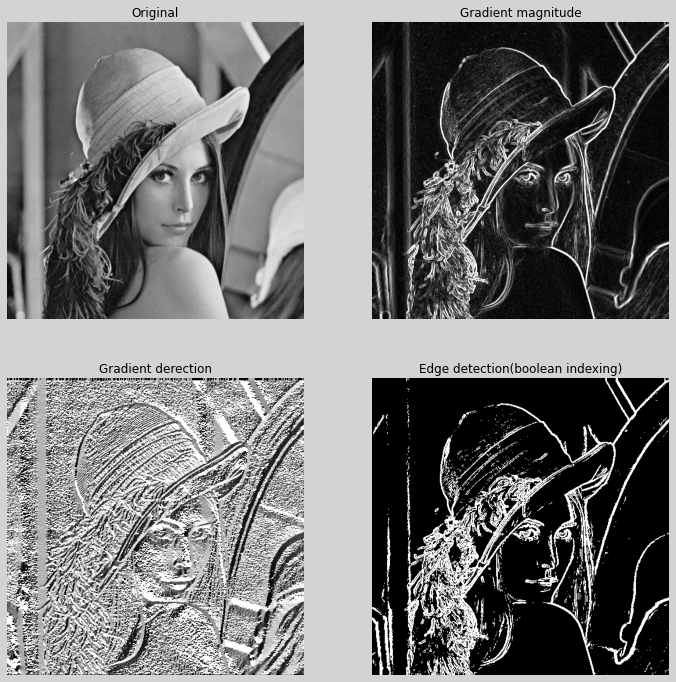

-1

In [156]:
# Edge detection example using sobel filter - 소벨 필터를 이용한 에지 검출 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(source, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(source, cv2.CV_32F, 0, 1)

# 그래디언트 크기
magnitude = cv2.magnitude(dx, dy)
magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

# 그래디언트 방향
phase = cv2.phase(dx, dy, angleInDegrees=True)
phase = np.clip(phase, 0, 255).astype(np.uint8)

# 불리언 인덱싱으로 엣지 표현
edge = np.zeros(magnitude.shape[:2], np.uint8)
edge[magnitude > 80] = 255

# pyplot으로 출력
plt.figure(figsize=(12, 12), facecolor="lightgray")

plt.subplot(221, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(222, title="Gradient magnitude").axis("off")
plt.imshow(magnitude, "gray")

plt.subplot(223, title="Gradient derection").axis("off")
plt.imshow(phase, "gray")

plt.subplot(224, title="Edge detection(boolean indexing)").axis("off")
plt.imshow(edge, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Gradient magnitude", magnitude)
cv2.imshow("Gradient direction", phase)
cv2.imshow("Edge detection(boolean indexing)", edge)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #3: Canny edge detection - 캐니 에지 검출</font>

<hr>

### Step #1: intro
<hr>

- 좋은 에지 검출기의 조건(J. Canny)
    - 정확한 검출(Good detection): 에지가 아닌 점을 에지로 찾거나 또는 에지인데 에지로 찾지 못하는 확률을 최소화
    - 정확한 위치(Good localization): 실제 에지의 중심을 검출
    - 단일 에지(Single edge): 하나의 에지는 하나의 점으로 표현

<hr>

### Step #2: How to Canny edge detection
<hr>

- 캐니 에지 검출 1단계
    - 가우시안 필터링
        - (Optional) 잡음 제거 목적

$$G_\sigma(x,y)=\frac{1}{2\pi\sigma^2}\exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$$
<hr>

- 캐니 에지 검출 2단계
    - 그래디언트 계산
        - 소벨 마스크와 샤르 마스크 중 주로 소벨 마스크를 사용한다.

$$\cdot\text{magnitude:}\ \|f\|=\sqrt{f_x^2+f_y^2}$$

$$\cdot\text{direction:}\ \theta=\tan^{-1}\left(\frac{f_y}{f_x}\right)$$

$$\scriptstyle{\divideontimes\ \theta\ \text{를 4구역으로 단순화 한다.(디지털 영상에서 사용하기 위한 용도)}}$$

<p align="center"><img src="images/markdown/gradient_direction.png"></p>
<hr>

- 캐니 에지 검출 3단계
    - 비최대 억제(Non-maximum suppression)
        - 하나의 에지가 여러 개의 픽셀로 표현되는 현상을<br>
        없애기 위하여 그래디언트 크기가 `국지적 최대(local maximum)`인<br>
        픽셀만을 에지 픽셀로 설정한다.
        - 같은 `그래디언트 방향`에 위치한 앞,뒤 두 개의 픽셀을 조사하여<br>
        국지적 최대를 검사한다.

<img src="images/markdown/local_maximum.png">
<hr>

- 캐니 에지 검출 4단계
    - 히스테리시스 에지 트래킹(Hysteresis edge tracking)

$$\cdot\text{Use a two of Threshold(T):}\quad T_{Low},T_{High}$$

$$\cdot\text{Strong Edge(S.E.):}\quad\|f\|\ge T_{High}\rightarrow\text{selected as final edges.}$$

$$\cdot\text{Week Edge(W.E.):}\quad T_{Low}\le\|f\|＜\ T_{High}\rightarrow\text{Only pixels connected with strong edges are selected as final edges.}$$

$$\cdot\text{Non-Edge(N.E.):}\quad\|f\|＜\ T_{Low}\rightarrow\text{Not a edges.}$$

<p align="center"><img src="images/markdown/hysteresis_edge_tracking.png" width="500"></p>

<hr>

### Step #3: Example a Canny edge detection
<hr>

- 캐니 에지 검출 과정 예시

<img src="images/markdown/Canny_input_image.png" width="250">
<img src="images/markdown/Canny_gradient_magnitude.png" width="250">
<img src="images/markdown/Canny_non-maximum_supression.png" width="250">
<img src="images/markdown/Canny_hysteresis_edge_tracking.png" width="250">

<hr>

### Step #4: about function
<hr>

> `캐니 에지 검출 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}Canny}(image, threshold1, threshold2, edges, apertureSize, L2gradient)\rightarrow edges}$$
- images: 입력 영상
- threshold1: 하단 임계값
- threshold2: 상단 입계값
- edges: 에지 영상
- apertureSize: 소벨 연산을 위한 커널 크기. `기본값은 3`
- L2gradient: True이면 L2 norm 사용, False이면 L1 norm 사용. `기본값은 False`
- 참고사항:
    - 하단 임계값:상단 임계값 = 1:2 or 1:3(typically)
    
$$\cdot L_2\ norm=\sqrt{f_x^2+f_y^2}$$
$$\cdot L_1\ norm=|f_x|+|f_y|$$

In [ ]:
import cv2
help(cv2.Canny)

<hr>

### Step #5: implementation example
<hr>

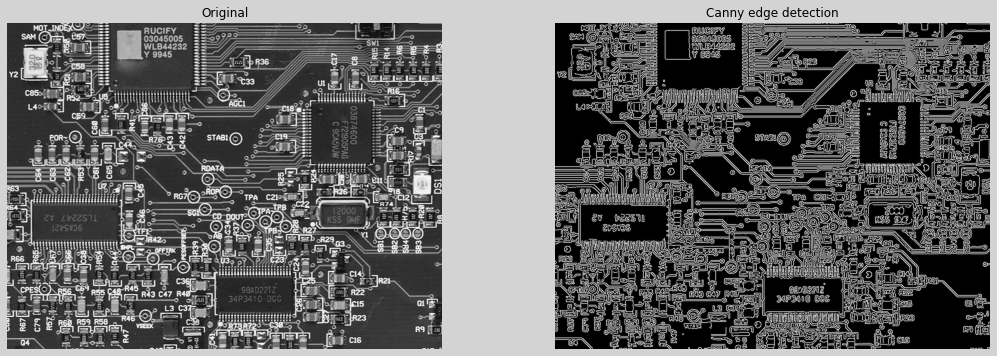

-1

In [216]:
# Example the Canny edge detection - 캐니 에지 검출 예제
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/circuit2.bmp", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(source, (0, 0), 0.7)

canny = cv2.Canny(blur, 50, 150, L2gradient=True)
canny = cv2.resize(canny, (0, 0), fx=1.5, fy=1.5, interpolation=cv2.INTER_LANCZOS4)

# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Canny edge detection").axis("off")
plt.imshow(canny, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Canny edge detection", canny)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #4: Hough transform - 허프 변환</font>

<hr>

### Step #1: What is line detection?
<hr>

- 허프 변환 직선 검출
    - 2차원 영상 좌표에서의 직선의 방정식을 파라미터(parameter) 공간으로 변환하여 직선을 찾는 알고리즘을 말한다.
    - <p align="center"><img src="images/markdown/line_detection.png" width="500"></p>

$$y=ax+b\quad\Leftrightarrow\quad b=-xa+y$$

<hr>

### Step #2: How to line detection
<hr>

- 축적 배열(accumulation array)
    - 직선 성분과 관련된 원소 값을 1씩 증가시키는 배열이다.
    - <img src="images/markdown/line_detection_process1.png" width="500">
    - <img src="images/markdown/line_detection_process2.png" width="500">
    - <img src="images/markdown/line_detection_process3.png" width="500">
    - <img src="images/markdown/line_detection_process4.png" width="500">

<hr>

### Step #3: Ploblem and Solution of linear equation
<hr>

- 직선의 방정식 y = ax + b 를 사용할 때의 문제점
    - y축과 평행한 수직선을 표현하지 못함 -> 극좌표계 직선의 방정식을 사용
    - <img src="images/markdown/linear_equation_polar_coordinate.png" width="500">

- xcosθ + ysinθ = ρ 방정식에 의한 파라미터 공간으로의 변환
    - <img src="images/markdown/line_detection_process5.png" width="500">

<hr>

### Step #4: about function
<hr>

> `허프 변환에 의한 선분 검출 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}HoughLines}(image, rho, theta, threshold, lines, srn, stn, min\_theta, max\_theta)\rightarrow lines}$$
- image: `입력 에지 영상`
- rho: 축적 배열에서 rho 값의 간격. `(e.g., 1.0 -> 1px 간격.)`
- theta: 축적 배열에서 theta 값의 간격. `(e.g., np.pi/180 -> 1˚ 간격.)`
- threshold: 축적 배열에서 직선으로 판단할 임계값.
- lines: 직선의 파라미터(rho, theta) 정보를 담고 있는 `numpy.ndarray.`<br>
`shape=(N, 1, 2).` `dtype=numpy.float32.`
- srn, stn: 멀티 스케일 허프 변환에서 rho 해상도, theta 해상도를 나누는 값.<br>
`기본값은 0이고,` 이 경우 일반 허프 변환을 수행한다.
- min_theta, max_theta: 검출할 선분의 최소, 최대 theta 값
<hr>

> `확률적 허프 변환에 의한 선분 검출 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}HoughLinesP}(image, rho, theta, threshold, lines, minLineLength, maxLineGap)\rightarrow lines}$$
- image: `입력 에지 영상`
- rho: 축적 배열에서 rho 값의 간격. `(e.g., 1.0 -> 1px 간격.)`
- theta: 축적 배열에서 theta 값의 간격. `(e.g., np.pi/180 -> 1˚ 간격.)`
- threshold: 축적 배열에서 직선으로 판단할 임계값.
- lines: 선분의 시작과 끝 좌표(x1, y1, x2, y2) 정보를 담고 있는 `numpy.ndarray.`<br>
`shape=(N, 1, 4).` `dtype=numpy.int32.`
- minLineLength: 검출할 선분의 최소 길이
- maxLineGap: 직선으로 간주할 최대 에지 점 간격

<hr>

### Step #5: implementation example
<hr>

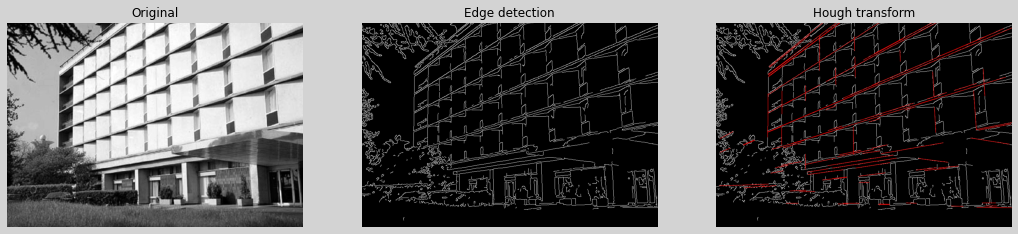

-1

In [221]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/building.jpg", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(source, (0, 0), 1)

edges = cv2.Canny(blur, 100, 150)

lines = cv2.HoughLinesP(edges, 1.0, np.pi / 180, 110, minLineLength=30, maxLineGap=9)

destination = cv2.cvtColor(edges.copy(), cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        point1 = (lines[i][0][0], lines[i][0][1])
        point2 = (lines[i][0][2], lines[i][0][3])
        cv2.line(destination, point1, point2, (0, 0, 255), 1, cv2.LINE_AA)

# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(132, title="Edge detection").axis("off")
plt.imshow(edges, "gray")

plt.subplot(133, title="Hough transform").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Edge detection", edges)
cv2.imshow("Hough transform", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Step #6: Hough transform application
<hr>

- 허프 변환 응용: 원 검출
    - 원의 방정식: (x-a)² + (y-b)² = c² -> 3차원 축적 평면?
- 속도 향상을 위해 Hough gradient method 사용
    - 입력 영상과 동일한 2차원 평면 공간에서 축적 영상을 생성한다.
    - 에지 픽셀에서 그래디언트를 계산한다.
    - 에지 방향에 따라 직선을 그리면서 값을 누적시킨다.
    - 원의 중심을 먼저 찾고, 적절한 반지름을 검출한다.
    - 단점
        - 여러 개의 동심원을 검출하지 못 함<br>
        -> 가장 작은 원 하나만 검출된다.
    - <img src="images/markdown/circle_detection.png" width="250">

<hr>



In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/dial.jpg")

source_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(source_gray, (0, 0), 1.0)


def on_change(position):
    min_radius = cv2.getTrackbarPos("minRadius", "image")
    max_radius = cv2.getTrackbarPos("maxRadius", "image")
    
    circles = cv2.HoughCircles(
        blur, cv2.HOUGH_GRADIENT_ALT, 1.5, 50,
        param1=300, param2=0.9, minRadius=min_radius, maxRadius=max_radius
        )
    
    destination = source.copy()
    
    if circles is not None:
        for i in range(circles.shape[1]):
            center_x, center_y, radius = circles[0][i].astype(np.uint32)
            cv2.circle(destination, (center_x, center_y), radius, (0, 0, 255), 2, cv2.LINE_AA)
    
    cv2.imshow("image", destination)


cv2.namedWindow("image")
cv2.createTrackbar("minRadius", "image", 10, 100, on_change)
cv2.createTrackbar("maxRadius", "image", 105, 200, on_change)
on_change(0)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #5: Coin counter - 동전 카운터

<hr>



In [129]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def coin_detector(image):
    if image is None:
        print("Image load failed!")

    # 1. 그레이스케일 영상으로 전환 - 컬러 영상보다 상대적으로 작은 연산량으로 허프 변환을 할 수 있다.
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1-1. 가우시안 블러 - 허프 변환 원 검출은 노이즈에 취약하기 때문에 블러 작업을 진행해야 한다.
    blur = cv2.GaussianBlur(image_gray, (0, 0), 1)

    # 2. 허프 변환 원 검출
    circles = cv2.HoughCircles(
        blur, cv2.HOUGH_GRADIENT_ALT, 1.5, 50,
        param1=300, param2=0.9, minRadius=20, maxRadius=80
        )

    destination = source.copy()  # 검출된 원을 표시할 결과 영상

    # 3. 원 검출 결과 및 동전 금액 그리기
    sum_of_coin = 0
    if circles is None:
        print("Hough detection is failed!")
    else:
        for i in range(circles.shape[1]):
            # 3-1. 검출한 원 그리기
            center_x, center_y, radius = circles[0][i].astype(np.uint32)
            cv2.circle(destination, (center_x, center_y), radius, (0, 0, 255), 2, cv2.LINE_AA)
            
            # 3-2. 검출한 ROI(동전 영역)의 좌표 할당
            x1 = center_x - radius
            y1 = center_y - radius
            x2 = center_x + radius
            y2 = center_y + radius
            
            # 3-3. 결과 영상에서 ROI(동전 영역) 추출
            crop = destination[y1:y2, x1:x2, :]
            CROP_WIDTH = crop.shape[1]
            CROP_HEIGHT = crop.shape[0]
            
            # 3-4. ROI(동전 영역)에 대한 마스크 영상 생성
            mask = np.zeros((CROP_HEIGHT, CROP_WIDTH), np.uint8)
            cv2.circle(mask, (center_x-x1, center_y-y1), radius, 255, -1, cv2.LINE_AA)
            
            # 3-5. ROI(동전 영역)의 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
            crop_hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
            crop_hue, _, _ = cv2.split(crop_hsv)
            hue_shift = (crop_hue+40) % 180
            mean_of_hue = cv2.mean(hue_shift, mask)[0]
            
            # 3-6. sum_of_coin에 검출한 동전 금액 더하기 - Hue 평균이 90보다 작으면 10원, 크면 100원으로 간주한다.
            if mean_of_hue < 90:
                won = 10
            else:
                won = 100
            
            sum_of_coin += won
            
            # 3-7. ROI(동전 영역)안에 해당 동전의 금액 그려 넣기
            cv2.putText(
                crop, str(won), (CROP_WIDTH // 4, CROP_HEIGHT // 2), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                0.75, (255, 0, 0), 2, cv2.LINE_AA
                )

    # 4. 결과 영상에 검출한 총 동전 금액 그려 넣기
    cv2.putText(
        destination, str(sum_of_coin) + " won", (40, 80), cv2.FONT_HERSHEY_DUPLEX,
        2, (255, 0, 0), 2, cv2.LINE_AA
        )
    
    return destination

source = cv2.imread("images/coins1.jpg")
# source = cv2.imread("images/coins2.jpg")

destination = coin_detector(source)

cv2.imshow("source", source)
cv2.imshow("destination", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1